## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load training and testing data
train_data = pd.read_csv('/Users/janiceli/Desktop/fashion-mnist_train.csv')
test_data = pd.read_csv('/Users/janiceli/Desktop/fashion-mnist_test.csv')

# Drop duplicated data
train_data = train_data.drop_duplicates().reset_index(drop=True)
test_data = test_data.drop_duplicates().reset_index(drop=True)

# Separate image and label data
# Normalize image data by scaling these values to a [0,1]
train_images = train_data/255.0
train_labels = train_data.iloc[:, 0]

test_images = test_data/255.0
test_labels = test_data.iloc[:, 0]

#EDA
# Map each image to a single label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Examine class distributions of training data
train_class_counts = np.bincount(train_labels)
train_class_names = [class_names[i] for i in range(len(train_class_counts))]
train_df = pd.DataFrame(data=train_class_counts, index=train_class_names, columns=['Train Count'])

# Examine class distributions of testing data
test_class_counts = np.bincount(test_labels)
test_class_names = [class_names[i] for i in range(len(test_class_counts))]
test_df = pd.DataFrame(data=test_class_counts, index=test_class_names, columns=['Test Count'])

# Concatenate the two DataFrames
pd.concat([train_df, test_df], axis=1).T

# Flatten the pixel values
train_pixel_values = train_data.drop(columns=['label']).values.flatten()
test_pixel_values = test_data.drop(columns=['label']).values.flatten()

# Use PCA to conduct dimension reduction
from sklearn.decomposition import PCA

# Concatenate the training and test data
combined_images = np.concatenate((train_images, test_images), axis=0)

# Apply PCA on the combined data to do dimension reduction
pca = PCA(n_components=188, random_state=2023)
combined_images_pca = pca.fit_transform(combined_images)

# Split the transformed data back into training and test sets
train_images = pd.DataFrame(combined_images_pca[:len(train_images)])
test_images = pd.DataFrame(combined_images_pca[len(train_images):])

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

## Fiting the SVM model

In [2]:
#Load the necessary packages
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import time
from sklearn import metrics

In [8]:
#Calculate the runtime using the optimal regularization parameter
start = time.time()

SVM = SVC(kernel="rbf", C = 50.0, gamma="auto")
SVM.fit(train_images, train_labels)

end = time.time()
svm_time = end-start

print("SVC Time:", svm_time)

SVC Time: 89.54104495048523


In [9]:
# Tune the parameter C with different values
#C = 1
SVM = SVC(kernel="rbf", C = 1.0, gamma="auto")
SVM.fit(train_images, train_labels)

y_train_svc = SVM.predict(train_images)
y_pred_svc = SVM.predict(test_images)
svc_train_accuracy = metrics.accuracy_score(train_labels,y_train_svc)
svc_test_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train_accuracy))
print("Test Accuracy score: {}".format(svc_test_accuracy))

Train Accuracy score: 0.8867021365311807
Test Accuracy score: 0.8806880688068807


In [19]:
#C = 10
SVM = SVC(kernel="rbf", C = 10.0, gamma="auto")

# Fit SVClassifier
SVM.fit(train_images, train_labels)

y_train_svc = SVM.predict(train_images)
y_pred_svc = SVM.predict(test_images)
svc_train_accuracy = metrics.accuracy_score(train_labels,y_train_svc)
svc_test_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train_accuracy))
print("Test Accuracy score: {}".format(svc_test_accuracy))

Train Accuracy score: 0.9257634638157346
Test Accuracy score: 0.9005900590059006


In [20]:
#C = 20

SVM = SVC(kernel="rbf", C = 20.0, gamma="auto")

# Fit SVClassifier
SVM.fit(train_images, train_labels)

y_train_svc = SVM.predict(train_images)
y_pred_svc = SVM.predict(test_images)
svc_train_accuracy = metrics.accuracy_score(train_labels,y_train_svc)
svc_test_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train_accuracy))
print("Test Accuracy score: {}".format(svc_test_accuracy))

Train Accuracy score: 0.9403906132728456
Test Accuracy score: 0.905990599059906


In [21]:
#C = 30

SVM = SVC(kernel="rbf", C = 30.0, gamma="auto")

# Fit SVClassifier
SVM.fit(train_images, train_labels)

y_train_svc = SVM.predict(train_images)
y_pred_svc = SVM.predict(test_images)
svc_train_accuracy = metrics.accuracy_score(train_labels,y_train_svc)
svc_test_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train_accuracy))
print("Test Accuracy score: {}".format(svc_test_accuracy))

Train Accuracy score: 0.9490968527444669
Test Accuracy score: 0.906990699069907


In [4]:
#C = 50

SVM = SVC(kernel="rbf", C = 50.0, gamma="auto")

# Fit SVClassifier
SVM.fit(train_images, train_labels)

y_train_svc = SVM.predict(train_images)
y_pred_svc = SVM.predict(test_images)
svc_train_accuracy = metrics.accuracy_score(train_labels,y_train_svc)
svc_test_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train_accuracy))
print("Test Accuracy score: {}".format(svc_test_accuracy))

Train Accuracy score: 0.9598378838167353
Test Accuracy score: 0.9075907590759076


In [22]:
#C = 100

SVM = SVC(kernel="rbf", C = 100.0, gamma="auto")

# Fit SVClassifier
SVM.fit(train_images, train_labels)

y_train_svc = SVM.predict(train_images)
y_pred_svc = SVM.predict(test_images)
svc_train_accuracy = metrics.accuracy_score(train_labels,y_train_svc)
svc_test_accuracy = metrics.accuracy_score(test_labels, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train_accuracy))
print("Test Accuracy score: {}".format(svc_test_accuracy))

Train Accuracy score: 0.9735143519522325
Test Accuracy score: 0.9071907190719072


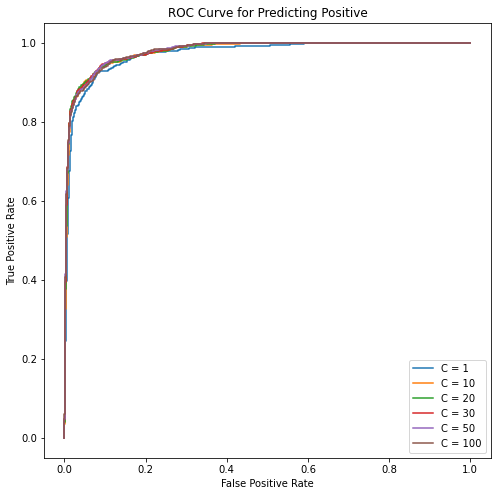

In [7]:
#Define C values
Cval = [1, 10, 20, 30, 50, 100]

plt.figure(figsize=(8,8))
#Generate ROC curve based on the loop over different C values.
for C in Cval:
        SVM = SVC(C = C, kernel = 'rbf', gamma="auto")
        SVM.fit(train_images, train_labels)
        scores = SVM.decision_function(test_images)[:,2]
        fpr, tpr, _ = metrics.roc_curve(test_labels == 2, scores)
        plt.plot(fpr, tpr, label='C = {}'.format(C))
        
        
plt.title('ROC Curve for Predicting Positive')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Confusion matrix for SVM

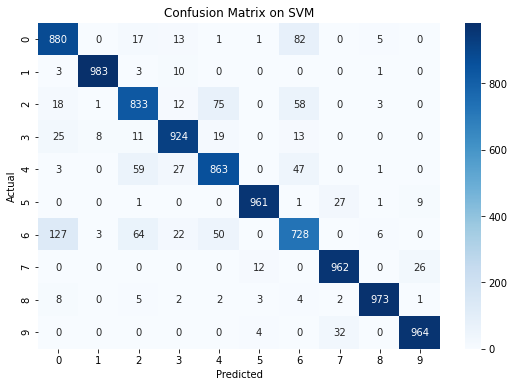

<Figure size 432x288 with 0 Axes>

In [23]:
#Confusion Matrix on SVM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, y_pred_svc)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix on SVM')
# Display the plot
plt.show()
plt.savefig('Confusion-svm.png', bbox_inches='tight')

In [ ]:
# Print accuracy on test data and labels
accuracy = SVM.score(Xtst_nm, Ytst)

# Print Confusion Matrix
conf_matrix =  confusion_matrix(Ytst, Y_pred)

print(f"SVM Model's accuracy: {accuracy}") 
PlotConfusionMatrix(conf_matrix, list(range(0,10)), normalize=True)

## Reference
- https://towardsdatascience.com/demystifying-support-vector-machines-8453b39f7368#:~:text=and%20so%20on.-,Geometric%20Intuition,the%20negative%20plane%20is%20maximum.
- https://scikit-learn.org/stable/modules/svm.html
- Credit to HW2